## K Means Clustering Algorithms


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[-5.16592636, -7.36219744],
       [-5.7493496 , -8.24413812],
       [-4.66514225,  9.67250964],
       ...,
       [-1.62070794, -5.75511673],
       [-2.12677938, -5.60034547],
       [-3.85547963, -7.08561741]], shape=(1000, 2))

In [5]:
y

array([2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1,
       2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1,
       1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0,
       1, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2,
       2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2,

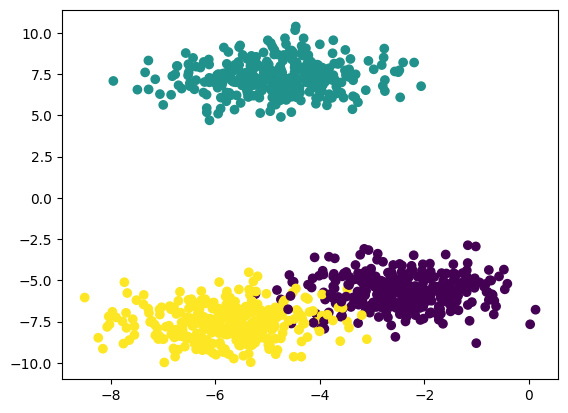

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
# standaradization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans


In [14]:
# Elbow method to selcet K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1340.0000000000005,
 857.2697481654707,
 222.1902839965601,
 171.68848122068871,
 120.01676855773283,
 89.7196948623905,
 77.54351682910084,
 69.53749573639642,
 52.20625568858817,
 46.686892229029475]

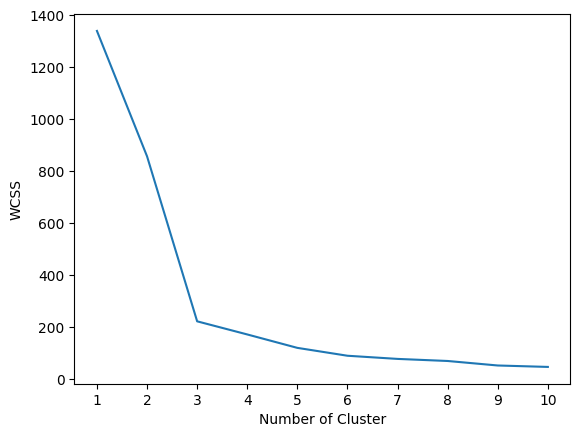

In [16]:
## Plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Cluster')
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [18]:
kmeans.fit_predict(X_test_scaled)

array([1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2,
       1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2,
       1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1,
       1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0,
       1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2,
       1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1,
       1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1,

In [19]:
y_pred=kmeans.predict(X_test_scaled)

In [20]:
y_pred

array([1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2,
       1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2,
       1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1,
       1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0,
       1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2,
       1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1,
       1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1,

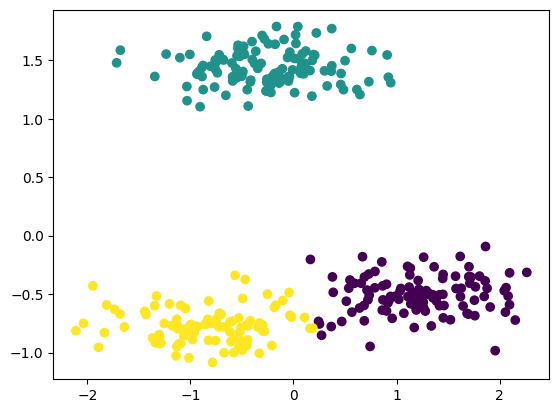

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [22]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [23]:
## kneelocator
!pip install kneed


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from kneed import KneeLocator

In [25]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [26]:
kl.elbow

np.int64(3)

In [27]:
## silhoutte score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [30]:
silhouette_coefficients

[np.float64(0.5421359665629356),
 np.float64(0.6549599818849322),
 np.float64(0.5960893156062701),
 np.float64(0.512848306338127),
 np.float64(0.4731894430677439),
 np.float64(0.45683608598304704),
 np.float64(0.44813384890777114),
 np.float64(0.42770736124313885),
 np.float64(0.41728578307261)]

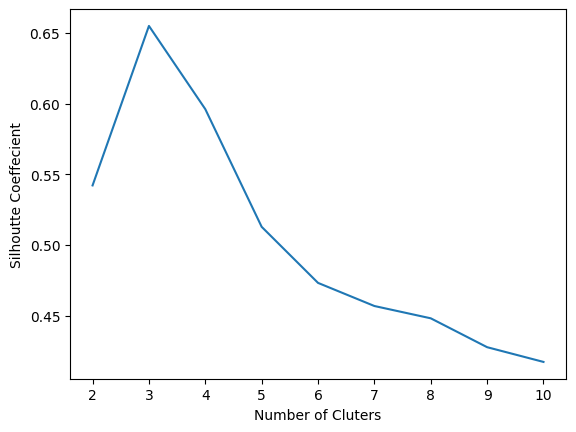

In [31]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()